# Video and Audio Tampering Detection:

### 1. Extract Metadata from Video and Audio
## Audio:
### 2. Create Spectrogram of 
    i.  People talking (Untampered)
    ii. People talking (Tampered)
    iii.Various background noises and musical instruments 
## Video:
###    3.   ELA Generation of frames in video.
###    4.  BRISQUE score generation. 
    


In [1]:
from scipy.io import wavfile # scipy library to read wav files
import numpy as np

AudioName = "audio.wav" # Audio File
fs, Audiodata = wavfile.read(AudioName)

# Plot the audio signal in time
import matplotlib.pyplot as plt
plt.plot(Audiodata)
plt.title('Audio signal in time',size=16)

# spectrum
from scipy.fftpack import fft # fourier transform
n = len(Audiodata) 
AudioFreq = fft(Audiodata)
AudioFreq = AudioFreq[0:int(np.ceil((n+1)/2.0))] #Half of the spectrum
MagFreq = np.abs(AudioFreq) # Magnitude
MagFreq = MagFreq / float(n)
# power spectrum
MagFreq = MagFreq**2
if n % 2 > 0: # ffte odd 
    MagFreq[1:len(MagFreq)] = MagFreq[1:len(MagFreq)] * 2
else:# fft even
    MagFreq[1:len(MagFreq) -1] = MagFreq[1:len(MagFreq) - 1] * 2 

plt.figure()
freqAxis = np.arange(0,int(np.ceil((n+1)/2.0)), 1.0) * (fs / n);
plt.plot(freqAxis/1000.0, 10*np.log10(MagFreq)) #Power spectrum
plt.xlabel('Frequency (kHz)'); plt.ylabel('Power spectrum (dB)');


#Spectrogram
from scipy import signal
N = 512 #Number of point in the fft
f, t, Sxx = signal.spectrogram(Audiodata, fs,window = signal.blackman(N),nfft=N)
plt.figure()
plt.pcolormesh(t, f,10*np.log10(Sxx)) # dB spectrogram
#plt.pcolormesh(t, f,Sxx) # Lineal spectrogram
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [seg]')
plt.title('Spectrogram with scipy.signal',size=16);

plt.show()

ModuleNotFoundError: No module named 'scipy'

In [ ]:
import cv2
import os, time
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'librosa'

In [ ]:
# Load in sounds
audio, ar = librosa.load('audio.wav')
guitar, sr = librosa.load('audio2.wav')
talk, tr = librosa.load('talk.wav')

In [ ]:
def to_decibles(signal):
    # Perform short time Fourier Transformation of signal and take absolute value of results
    stft = np.abs(librosa.stft(signal))
    # Convert to dB
    D = librosa.amplitude_to_db(stft, ref = np.max) # Set reference value to the maximum value of stft.
    return D # Return converted audio signal

# Function to plot the converted audio signal
def plot_spec(D, sr, instrument):
    fig, ax = plt.subplots(figsize = (30,10))
    spec = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear', ax=ax)
    ax.set(title = 'Spectrogram of ' + instrument)
    fig.colorbar(spec)

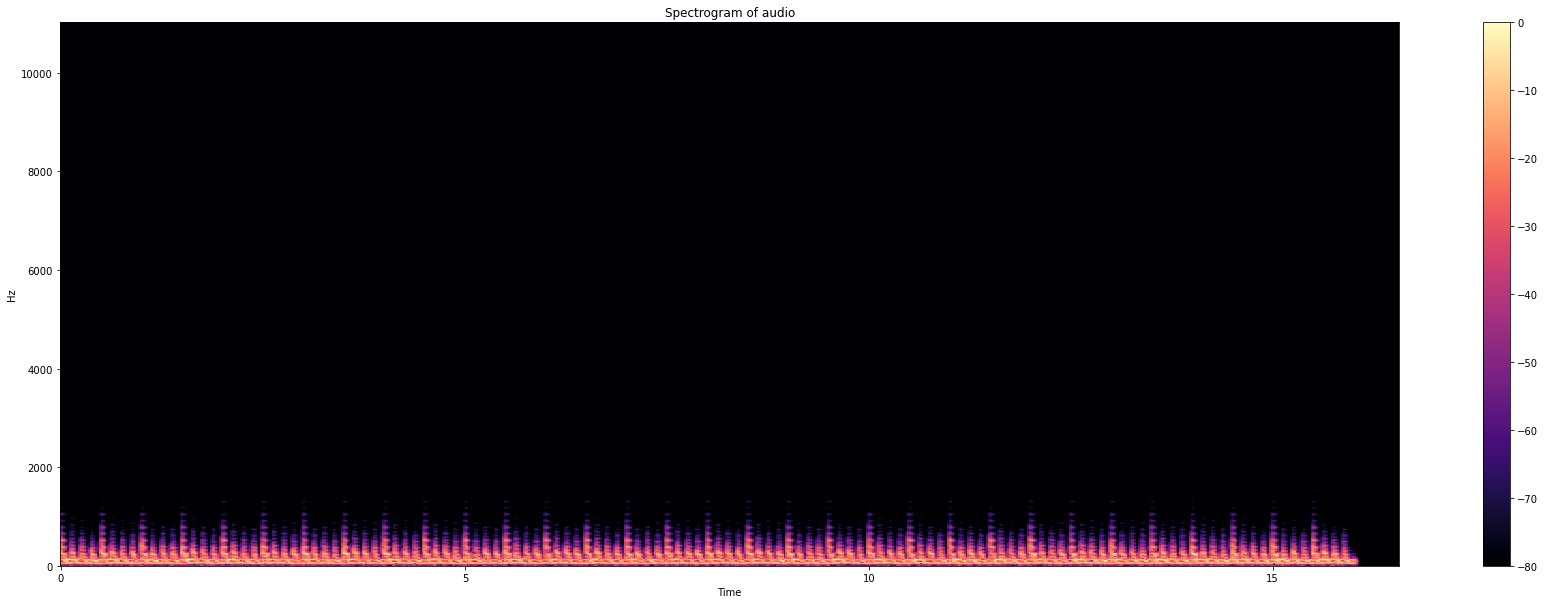

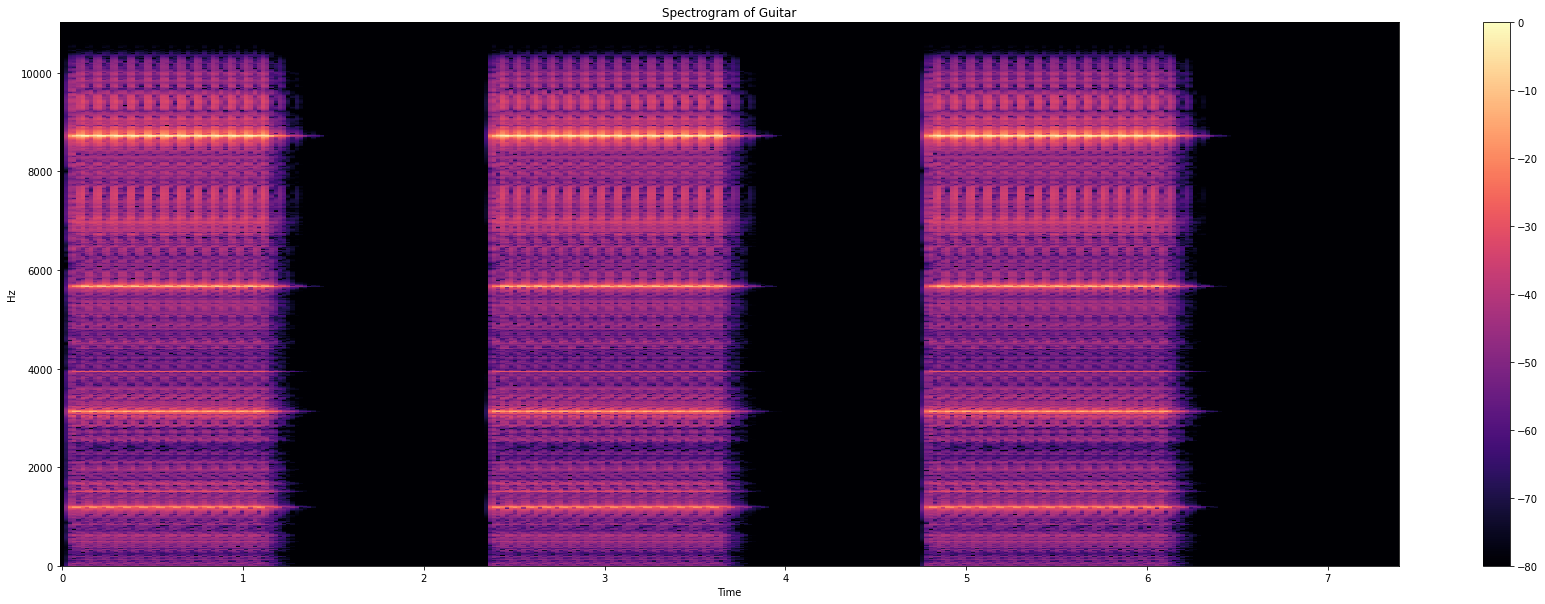

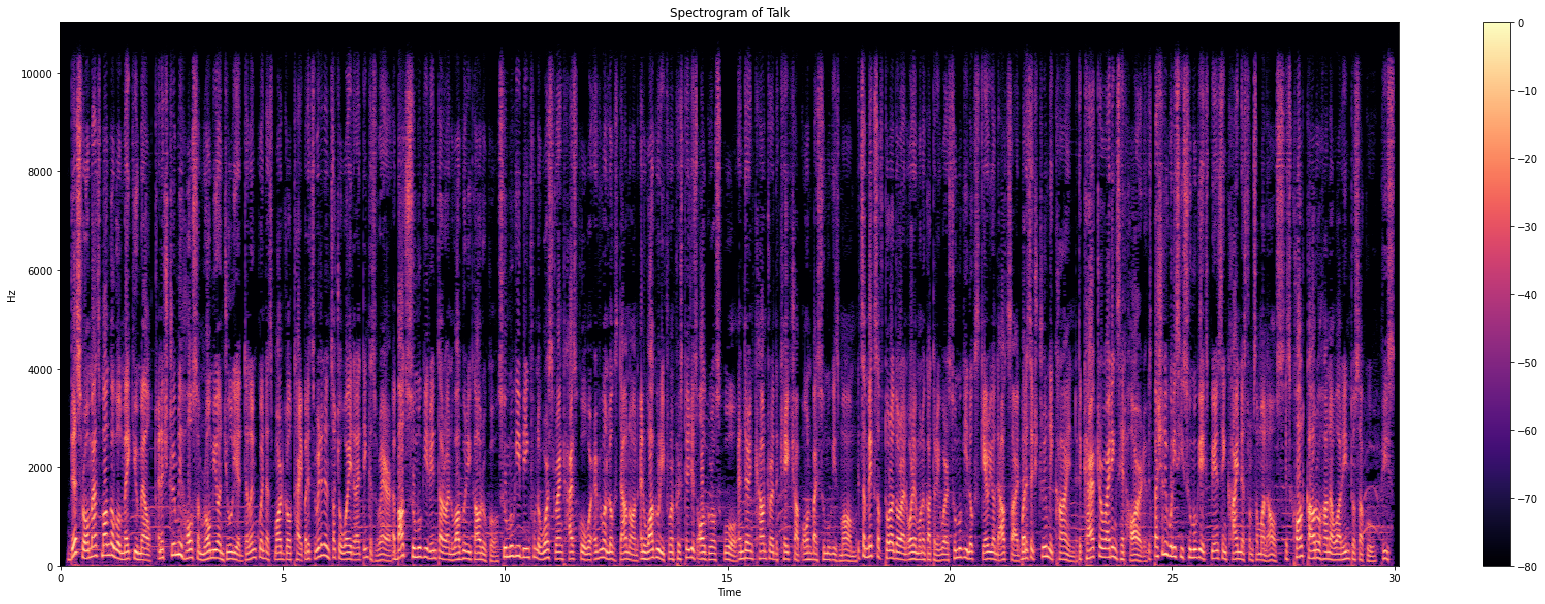

In [ ]:
plot_spec(to_decibles(audio), ar, 'audio')
plot_spec(to_decibles(guitar), sr, 'Guitar')
plot_spec(to_decibles(talk), tr, 'Talk')

In [2]:
print("Last Creation:     %s"%time.ctime(os.path.getctime("video.mp4")))
print("Last Modification: %s"%time.ctime(os.path.getmtime("video.mp4")))
print("File Size:         %s bytes"%os.stat("audio.wav").st_size)

In [ ]:
# Read the video from specified path
vid = cv2.VideoCapture('C:/Users/ASUS/Desktop/ELA/video.mp4')

try:

    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')

# if not created then raise error
except OSError:
    print('Error: Creating directory of data')

In [ ]:
# frame
currentframe = 0

while (True):

    # reading from frame
    success, frame = vid.read()

    if success:
        # continue creating images until video remains
        name = './data/frame' + str(currentframe) + '.jpg'
        print('Creating...' + name)

        # writing the extracted images
        cv2.imwrite(name, frame)

        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break

# Release all space and windows once done
vid.release()
cv2.destroyAllWindows()

Creating..../data/frame0.jpg
Creating..../data/frame1.jpg
Creating..../data/frame2.jpg
Creating..../data/frame3.jpg
Creating..../data/frame4.jpg
Creating..../data/frame5.jpg
Creating..../data/frame6.jpg
Creating..../data/frame7.jpg
Creating..../data/frame8.jpg
Creating..../data/frame9.jpg
Creating..../data/frame10.jpg
Creating..../data/frame11.jpg
Creating..../data/frame12.jpg
Creating..../data/frame13.jpg
Creating..../data/frame14.jpg
Creating..../data/frame15.jpg
Creating..../data/frame16.jpg
Creating..../data/frame17.jpg
Creating..../data/frame18.jpg
Creating..../data/frame19.jpg
Creating..../data/frame20.jpg
Creating..../data/frame21.jpg
Creating..../data/frame22.jpg
Creating..../data/frame23.jpg
Creating..../data/frame24.jpg
Creating..../data/frame25.jpg
Creating..../data/frame26.jpg
Creating..../data/frame27.jpg
Creating..../data/frame28.jpg
Creating..../data/frame29.jpg
Creating..../data/frame30.jpg
Creating..../data/frame31.jpg
Creating..../data/frame32.jpg
Creating..../data/fr

In [ ]:
!python elanal.py --dir "C:/Users/ASUS/Desktop/ELA/data"

Performing ELA on images at C:/Users/ASUS/Desktop/ELA/data
Finished!
Head to C:/Users/ASUS/Desktop/ELA/data\generated to check the results!


In [ ]:
!python video.py

C:\Users\ASUS\Desktop\ELA
352 640
frame0.ela.png  is resized
352 640
frame1.ela.png  is resized
352 640
frame10.ela.png  is resized
352 640
frame100.ela.png  is resized
352 640
frame101.ela.png  is resized
352 640
frame102.ela.png  is resized
352 640
frame103.ela.png  is resized
352 640
frame104.ela.png  is resized
352 640
frame105.ela.png  is resized
352 640
frame106.ela.png  is resized
352 640
frame107.ela.png  is resized
352 640
frame108.ela.png  is resized
352 640
frame109.ela.png  is resized
352 640
frame11.ela.png  is resized
352 640
frame110.ela.png  is resized
352 640
frame111.ela.png  is resized
352 640
frame112.ela.png  is resized
352 640
frame113.ela.png  is resized
352 640
frame114.ela.png  is resized
352 640
frame115.ela.png  is resized
352 640
frame116.ela.png  is resized
352 640
frame117.ela.png  is resized
352 640
frame118.ela.png  is resized
352 640
frame119.ela.png  is resized
352 640
frame12.ela.png  is resized
352 640
frame120.ela.png  is resized
352 640
frame121.el

In [ ]:
!python fps.py

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4

Moviepy - Done !
Moviepy - video ready __temp__.mp4



t:  87%|########6 | 26/30 [00:00<00:00, 259.68it/s, now=None]
                                                             
